In [1]:
import pandas as pd
from openai import OpenAI
from dotenv import load_dotenv
import time
import argparse
import csv
import os

from _0_prepare_tasks import clean_csv
from _1_translate_tasks import translate_csv
from _2_solve_tasks import solve_tasks
from _3_technical_terms import extract_technical_terms
from _4_evaluate_solution import evaluate_solutions
from _5_cross_lang_validation import compare_results

## Data collection

#### Cleaning exercises list file

In [2]:
input_exercises = "topic_areas.csv"
cleaned_exercises = "topic_areas_cleaned.csv"

clean_csv(input_exercises, cleaned_exercises)

print(f"Cleaned exercises saved to {cleaned_exercises}")

Cleaned exercises saved to topic_areas_cleaned.csv


### Translate exercises to German and Arabic

In [3]:
translated_exercises_de = "topic_areas_cleaned_de.csv"
translated_exercises_ar = "topic_areas_cleaned_ar.csv"

**German translation**

In [4]:
translate_csv(cleaned_exercises, translated_exercises_de, target_language="German")
print(f"Translated tasks to German saved to {translated_exercises_de}")

Translating exercises from English to German...
Translation to German complete. CSV file saved as: topic_areas_cleaned_de.csv.
Translated tasks to German saved to topic_areas_cleaned_de.csv


**Arabic translation**

In [5]:
translate_csv(cleaned_exercises, translated_exercises_ar, target_language="Arabic")
print(f"Translated tasks to Arabic saved to {translated_exercises_ar}")

Translating exercises from English to Arabic...
Translation to Arabic complete. CSV file saved as: topic_areas_cleaned_ar.csv.
Translated tasks to Arabic saved to topic_areas_cleaned_ar.csv


## Solving Exercises

In [6]:
solved_exercises_en = "topic_areas_solutions_en.csv"
solved_exercises_de = "topic_areas_solutions_de.csv"
solved_exercises_ar = "topic_areas_solutions_ar.csv"

In [7]:
def show_results_overview(df, model="gpt-4o-mini"):
    for index, row in df.iterrows():
        if index > 3:
            break;
        print(f"Topic Area: {row['Topic Area']}")
        print(f"Topic: {row['Topic']}")
        print(f"Progress Level: {row['Progress Level']}")
        print(f"Exercise: {row['Exercise']}")
        print()
        print(f"gpt-4o solution:")
        print(f"{row[f"{model} solution"]}")
        print(f"--------------------------\n")

In [16]:
import importlib
import _2_solve_tasks

importlib.reload(_2_solve_tasks)
from _2_solve_tasks import solve_tasks

English Solutions:

In [9]:
solve_tasks(cleaned_exercises, solved_exercises_en)
print(f"Solved tasks in English saved to {solved_exercises_en}")

df_en = pd.read_csv(solved_exercises_en)
print(df_en.head())

Solving task 1: Draw 10 stars in the box and color 5 of them blue.
Solving task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Solving task 3: Write the numbers from 1 to 20 in order on the lines provided.
Solving task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Solving task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Solving task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Solving task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Solving task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total?
Solving task 9: Liam read 45 pages of his book then finished 22 more pages; how many pages did he read altogether?
Solving task 10: Sarah has 8 boxes of cookies and each box contains

In [17]:
df_en = pd.read_csv(solved_exercises_en)

show_results_overview(df_en)

Topic Area: Numbers and operations
Topic: Understanding and representing numbers
Progress Level: B
Exercise: Draw 10 stars in the box and color 5 of them blue.

gpt-4o solution:
To solve the task of drawing 10 stars in a box and coloring 5 of them blue, follow these steps:

1. **Prepare Your Materials**: 
   - Get a piece of paper or open a drawing application if you are using a digital device.
   - Have coloring materials ready (colored pencils, crayons, or markers if working on paper).

2. **Draw the Box**:
   - Use a ruler to draw a box on your paper or use the shape tool in a drawing application to create a rectangular or square box. Make sure it’s large enough to fit 10 stars.

3. **Draw the Stars**:
   - Inside the box, start drawing stars. You can use a simple 5-pointed star shape or any star shape you prefer.
   - To draw a 5-pointed star, start with a single line going from the top point down to one of the bottom points, then create two diagonal lines to form the star shape. R

German Solutions:

In [18]:
solve_tasks(translated_exercises_de, solved_exercises_de)
print(f"Solved tasks in German saved to {solved_exercises_de}")

Solving task 1: Zeichne 10 Sterne in das Kästchen und male 5 davon blau.
Solving task 2: Zähle die Anzahl der Äpfel im Bild und schreibe die Gesamtsumme in den leeren Kreis darunter.
Solving task 3: Schreibe die Zahlen von 1 bis 20 der Reihenfolge nach auf die vorgesehenen Linien.
Solving task 4: Zeichne Linien, um die Zahlen 1 bis 20 mit ihren passenden Punktmustern zu verbinden.
Solving task 5: Umkreise die Zahl, die die gleiche Anzahl von Punkten darunter hat; zum Beispiel, wenn du 5 Punkte siehst, umkreise die Zahl 5.
Solving task 6: Fülle die Lücken mit dem richtigen Zahlensymbol aus, das den auf der Seite gezeigten Punktmustern entspricht.
Solving task 7: Emma hat 24 Äpfel und sie gibt 13 Äpfel an ihre Freundin; wie viele Äpfel hat sie noch?
Solving task 8: Ein Bauer hat 36 Karotten und pflückt weitere 12 Karotten; wie viele Karotten hat er insgesamt?
Solving task 9: Liam hat 45 Seiten seines Buches gelesen und dann 22 weitere Seiten beendet; wie viele Seiten hat er insgesamt gel

In [19]:
df_de = pd.read_csv(solved_exercises_de)

show_results_overview(df_de)

Topic Area: Numbers and operations
Topic: Understanding and representing numbers
Progress Level: B
Exercise: Zeichne 10 Sterne in das Kästchen und male 5 davon blau.

gpt-4o solution:
Um die Aufgabe "Zeichne 10 Sterne in das Kästchen und male 5 davon blau" zu lösen, folge diesen Schritten:

1. **Vorbereitung:** Nimm ein Blatt Papier oder öffne ein Malprogramm auf deinem Computer, um ein Kästchen zu erstellen.
  
2. **Kästchen zeichnen:** Zeichne ein Quadrat oder Rechteck, das als Kästchen dient. Du kannst es mit einem Stift oder einem Programmwerkzeug umranden.

3. **Sterne zeichnen:** Zeichne insgesamt 10 Sterne in das Kästchen. Du kannst einfache Sterne mit 5 Zacken machen oder eine andere Variante wählen, die dir gefällt. Stelle sicher, dass die Sterne gut sichtbar sind.

4. **Sterne blau malen:** Wähle 5 der gezeichneten Sterne aus und male sie blau. Du kannst blaue Farbe oder einen blauen Stift verwenden, je nachdem, was du zur Verfügung hast.

5. **Fertigstellen:** Überprüfe das 

Arabic Solutions:

In [20]:
solve_tasks(translated_exercises_ar, solved_exercises_ar)
print(f"Solved tasks in Arabic saved to {solved_exercises_ar}")

Solving task 1: ارسم 10 نجوم في الصندوق والون 5 منها باللون الأزرق.
Solving task 2: احسب عدد التفاح في الصورة واكتب العدد الكلي في الدائرة الفارغة أدناه.
Solving task 3: اكتب الأرقام من 1 إلى 20 بالترتيب على الأسطر المتاحة.
Solving task 4: ارسم خطوطاً لربط الأرقام من 1 إلى 20 بأنماط النقاط المطابقة لها.
Solving task 5: قم بدائرة الرقم الذي يحتوي على نفس عدد النقاط الموجودة تحته؛ على سبيل المثال، إذا رأيت 5 نقاط، قم بدائرة الرقم 5.
Solving task 6: املأ الفراغات بالرمز الرقمي الصحيح الذي يطابق أنماط النقاط الموضحة في الصفحة.
Solving task 7: إيما لديها 24 تفاحة وقد أعطت 13 تفاحة لصديقتها؛ كم عدد التفاح المتبقي لديها؟
Solving task 8: مزارع لديه 36 جزرة ويقطف 12 جزرة أخرى؛ كم عدد الجزر التي يمتلكها في المجموع؟
Solving task 9: ليام قرأ 45 صفحة من كتابه ثم أنهى 22 صفحة أخرى؛ فكم صفحًة قرأها إجمالًا؟
Solving task 10: سارة لديها 8 علب من الكعك وكل علبة تحتوي على 12 كعكة; كم عدد الكعك الذي تمتلكه في المجموع؟
Solving task 11: يمتلك مزارع 240 تفاحة ويريد تعبئتها في سلال بحيث تحتوي كل سلة على 15 تف

In [21]:
df_ar = pd.read_csv(solved_exercises_ar)

show_results_overview(df_ar)

Topic Area: Numbers and operations
Topic: Understanding and representing numbers
Progress Level: B
Exercise: ارسم 10 نجوم في الصندوق والون 5 منها باللون الأزرق.

gpt-4o solution:
لحل هذه المهمة، يمكنك اتباع الخطوات التالية:

1. **رسم الصندوق**: ابدأ برسم شكل مربع أو مستطيل كصندوق. يمكن أن يكون لديك أي حجم تريده.

2. **رسم النجوم**: بعد أن ترسم الصندوق، قم برسم 10 نجوم داخل هذا الصندوق. يمكنك رسم النجوم بشكل عشوائي، أو توزيعها بشكل منتظم كما تفضل.

3. **تلوين بعض النجوم**: بعد أن تنتهي من رسم 10 نجوم، اختر 5 منها وقم بتلوينها باللون الأزرق. يمكنك استخدام أقلام تلوين، أو ألوان مائية، أو أي وسيلة تفضلها لتلوين النجوم.

4. **التأكد من النتيجة النهائية**: تأكد أن جميع الخطوات تمت بشكل صحيح وأن الصندوق يحتوي على 10 نجوم، منها 5 باللون الأزرق.

وبهذا تكون قد أكملت المهمة بنجاح!
--------------------------

Topic Area: Numbers and operations
Topic: Understanding and representing numbers
Progress Level: B
Exercise: احسب عدد التفاح في الصورة واكتب العدد الكلي في الدائرة الفارغة أدناه.

gpt-4o sol

## Extracting technical terms

In [22]:
terms_en = "technical_terms_en.csv"
terms_de = "technical_terms_de.csv"
terms_ar = "technical_terms_ar.csv"

English terms

In [23]:
extract_technical_terms(cleaned_exercises, terms_en, target_language="en")
print(f"Extracted technical terms in English saved to {terms_en}")

Extracting technical terms for task 1: Draw 10 stars in the box and color 5 of them blue.
Extracting technical terms for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Extracting technical terms for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Extracting technical terms for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Extracting technical terms for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Extracting technical terms for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Extracting technical terms for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Extracting technical terms for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total

German terms

In [24]:
extract_technical_terms(cleaned_exercises, terms_de, target_language="de")
print(f"Extracted technical terms in German saved to {terms_de}")

Extracting technical terms for task 1: Draw 10 stars in the box and color 5 of them blue.
Extracting technical terms for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Extracting technical terms for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Extracting technical terms for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Extracting technical terms for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Extracting technical terms for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Extracting technical terms for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Extracting technical terms for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total

Arabic terms

In [25]:
extract_technical_terms(cleaned_exercises, terms_ar, target_language="ar")
print(f"Extracted technical terms in Arabic saved to {terms_ar}")

Extracting technical terms for task 1: Draw 10 stars in the box and color 5 of them blue.
Extracting technical terms for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Extracting technical terms for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Extracting technical terms for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Extracting technical terms for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Extracting technical terms for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Extracting technical terms for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Extracting technical terms for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total

## Evaluating Solutions

In [26]:
evaluations_en = "topic_areas_evaluations_en.csv"
evaluations_de = "topic_areas_evaluations_de.csv"
evaluations_ar = "topic_areas_evaluations_ar.csv"

In [27]:
evaluate_solutions(solved_exercises_en, terms_en, evaluations_en)
print(f"Evaluation of solutions in English saved to {evaluations_en}")

Evaluating solution for task 1: Draw 10 stars in the box and color 5 of them blue.
Evaluating solution for task 2: Count the number of apples in the picture and write the total number in the empty circle below.
Evaluating solution for task 3: Write the numbers from 1 to 20 in order on the lines provided.
Evaluating solution for task 4: Draw lines to connect the numbers 1 to 20 with their matching dot patterns.
Evaluating solution for task 5: Circle the number that has the same number of dots underneath it; for example if you see 5 dots circle the number 5.
Evaluating solution for task 6: Fill in the blanks with the correct number symbol that matches the dot patterns shown on the page.
Evaluating solution for task 7: Emma has 24 apples and she gives 13 apples to her friend; how many apples does she have left?
Evaluating solution for task 8: A farmer has 36 carrots and picks another 12 carrots; how many carrots does he have in total?
Evaluating solution for task 9: Liam read 45 pages of 

In [28]:
evaluate_solutions(solved_exercises_de, terms_de, evaluations_de)
print(f"Evaluation of solutions in German saved to {evaluations_de}")

Evaluating solution for task 1: Zeichne 10 Sterne in das Kästchen und male 5 davon blau.
Evaluating solution for task 2: Zähle die Anzahl der Äpfel im Bild und schreibe die Gesamtsumme in den leeren Kreis darunter.
Evaluating solution for task 3: Schreibe die Zahlen von 1 bis 20 der Reihenfolge nach auf die vorgesehenen Linien.
Evaluating solution for task 4: Zeichne Linien, um die Zahlen 1 bis 20 mit ihren passenden Punktmustern zu verbinden.
Evaluating solution for task 5: Umkreise die Zahl, die die gleiche Anzahl von Punkten darunter hat; zum Beispiel, wenn du 5 Punkte siehst, umkreise die Zahl 5.
Evaluating solution for task 6: Fülle die Lücken mit dem richtigen Zahlensymbol aus, das den auf der Seite gezeigten Punktmustern entspricht.
Evaluating solution for task 7: Emma hat 24 Äpfel und sie gibt 13 Äpfel an ihre Freundin; wie viele Äpfel hat sie noch?
Evaluating solution for task 8: Ein Bauer hat 36 Karotten und pflückt weitere 12 Karotten; wie viele Karotten hat er insgesamt?
Ev

In [29]:
evaluate_solutions(solved_exercises_ar, terms_ar, evaluations_ar)
print(f"Evaluation of solutions in Arabic saved to {evaluations_ar}")

Evaluating solution for task 1: ارسم 10 نجوم في الصندوق والون 5 منها باللون الأزرق.
Evaluating solution for task 2: احسب عدد التفاح في الصورة واكتب العدد الكلي في الدائرة الفارغة أدناه.
Evaluating solution for task 3: اكتب الأرقام من 1 إلى 20 بالترتيب على الأسطر المتاحة.
Evaluating solution for task 4: ارسم خطوطاً لربط الأرقام من 1 إلى 20 بأنماط النقاط المطابقة لها.
Evaluating solution for task 5: قم بدائرة الرقم الذي يحتوي على نفس عدد النقاط الموجودة تحته؛ على سبيل المثال، إذا رأيت 5 نقاط، قم بدائرة الرقم 5.
Evaluating solution for task 6: املأ الفراغات بالرمز الرقمي الصحيح الذي يطابق أنماط النقاط الموضحة في الصفحة.
Evaluating solution for task 7: إيما لديها 24 تفاحة وقد أعطت 13 تفاحة لصديقتها؛ كم عدد التفاح المتبقي لديها؟
Evaluating solution for task 8: مزارع لديه 36 جزرة ويقطف 12 جزرة أخرى؛ كم عدد الجزر التي يمتلكها في المجموع؟
Evaluating solution for task 9: ليام قرأ 45 صفحة من كتابه ثم أنهى 22 صفحة أخرى؛ فكم صفحًة قرأها إجمالًا؟
Evaluating solution for task 10: سارة لديها 8 علب من

## Results Comparisons

In [30]:
files = {
    "en": evaluations_en,
    "de": evaluations_de,
    "ar": evaluations_ar,
}

In [31]:
cross_validation_results = compare_results(files)


=== Language with Highest Average for Each Metric ===

Problem Understanding (Comprehension)                                      en
Clarity and Step-by-Step Explanation                                       en
Accuracy of Process (Correctness of Steps)                                 en
Correctness of Final Answer                                                en
Learning Appropriateness (Is the Explanation Suitable for Learners?)       en
Generalization (Can the Learner Apply This Method to Similar Problems?)    en
Technical Terms Explanation                                                en
Addressing Common Errors                                                   en
Appropriateness Based on Progress Level (Grade)                            en
dtype: object


In [32]:
comparison_results = pd.read_csv('comparison_results.csv')
highest_averages = pd.read_csv('highest_averages.csv')

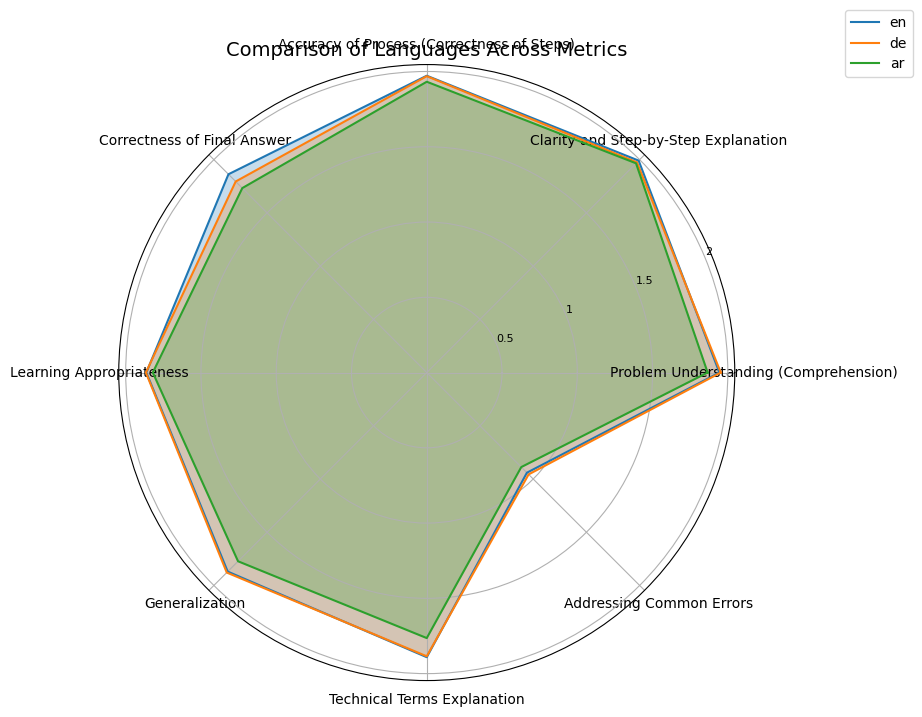

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data
languages = ['en', 'de', 'ar']
metrics = [
    "Problem Understanding (Comprehension)",
    "Clarity and Step-by-Step Explanation",
    "Accuracy of Process (Correctness of Steps)",
    "Correctness of Final Answer",
    "Learning Appropriateness",
    "Generalization",
    "Technical Terms Explanation",
    "Addressing Common Errors",
]
values = {
    "en": [1.944, 1.991, 1.972, 1.863, 1.863, 1.870, 1.891, 0.941],
    "de": [1.953, 1.975, 1.969, 1.795, 1.866, 1.879, 1.885, 0.957],
    "ar": [1.866, 1.966, 1.932, 1.733, 1.820, 1.773, 1.764, 0.888],
}

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Close the circle

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for lang in languages:
    data = values[lang] + values[lang][:1]  # Close the circle
    ax.plot(angles, data, label=lang)
    ax.fill(angles, data, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=10)
ax.set_yticks([0.5, 1, 1.5, 2])
ax.set_yticklabels(['0.5', '1', '1.5', '2'], fontsize=8)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Comparison of Languages Across Metrics', fontsize=14)
plt.show()


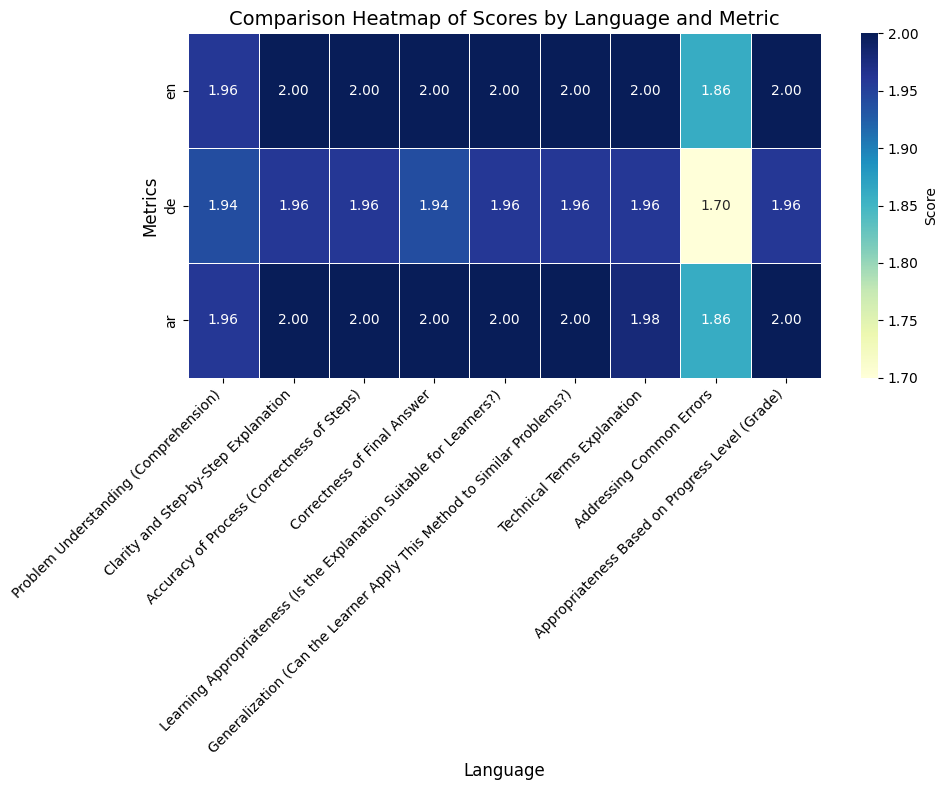

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("comparison_results.csv")

# Set the index of the DataFrame to the metrics column
data.set_index("Unnamed: 0", inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    data,
    annot=True,  # Show the values in each cell
    cmap="YlGnBu",  # Color palette
    fmt=".2f",  # Format the numbers to 2 decimal places
    linewidths=0.5,  # Add space between cells
    cbar_kws={'label': 'Score'}  # Label for the color bar
)

# Add labels and title
plt.title("Comparison Heatmap of Scores by Language and Metric", fontsize=14)
plt.xlabel("Language", fontsize=12)
plt.ylabel("Metrics", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
import importlib
import _6_find_differently_performing_exercises

importlib.reload(_6_find_differently_performing_exercises)
from _6_find_differently_performing_exercises import find_differently_performing_exercises

result = find_differently_performing_exercises([evaluations_en, evaluations_de, evaluations_ar])

result.to_csv("most_different_exercises.csv", index=False)

In [36]:
pd.read_csv("most_different_exercises.csv").head()

,exercise,language_1,language_2,language_3,Total_Difference
0,exercise_18,2.000000,1.000000,2.000000,1.000000
1,exercise_33,1.888889,1.000000,2.000000,1.000000
2,exercise_9,1.666667,2.000000,2.000000,0.333333
3,exercise_4,2.000000,1.777778,1.888889,0.222222
4,exercise_25,1.777778,2.000000,2.000000,0.222222


In [37]:
def get_exercise_solution(index, solutions_en, solutions_de, solutions_ar, model='gpt-4o-mini'):
    # Ensure index is within the bounds of the dataframes
    if index < 0 or index > len(solutions_en):
        raise ValueError("Index is out of bounds for the solutions dataframes.")
    
    # Retrieve the exercise solutions from each language file at the given index
    solution_en = solutions_en.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in English
    solution_de = solutions_de.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in German
    solution_ar = solutions_ar.iloc[index-1][f'{model} solution']  # Retrieve exercise solution in Arabic
    
    # Returning the exercise solutions as a dictionary
    return {
        'Exercise': solutions_en.iloc[index-1]['Exercise'],
        'English': solution_en,
        'German': solution_de,
        'Arabic': solution_ar
    }

In [39]:

# Example of usage:
index = 18  # Example index
sols_en = pd.read_csv(solved_exercises_en)
sols_de = pd.read_csv(solved_exercises_de)
sols_ar = pd.read_csv(solved_exercises_ar)
solutions = get_exercise_solution(index, sols_en, sols_de, sols_ar)
print(solutions['Exercise'])
print('---')
print(solutions['English'])
print('---')
print(solutions['German'])
print('---')
print(solutions['Arabic'])

A gardener needs to plant 29 flowers in rows of 3; apply the distributive property to calculate the total number of flowers he needs to plant.
---
To solve the task of calculating how many groups of 3 flowers are needed to reach a total of 29 flowers using the distributive property, follow these steps:

1. **Understand the Problem**: The gardener wants to plant 29 flowers and arrange them in rows of 3. The problem can be framed as finding out how many complete groups of 3 can be made from 29.

2. **Set Up the Equation**: To find how many rows of 3 flowers fit into 29, you can represent the total number of flowers as an equation:
   
   \[
   29 = 3 \times n + r
   \]

   Here, \(n\) is the number of complete rows (groups of 3 flowers), and \(r\) is the remainder (the number of flowers left after forming groups of 3). 

3. **Apply the Distributive Property**: To use the distributive property effectively here, you can express 29 in terms of multiples of 3. The idea is to break down 29 in